# 1. Import CSV Datei

In [137]:
import pandas as pd


housing_pd = pd.read_csv("housing.csv")

housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 2. Check for the Ocean_proximity values 

In [138]:
housing_pd['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

# 3. take the complet data as simple 

In [139]:
housing_pd_suffled = housing_pd.sample(n = len(housing_pd),random_state=1) #take a simple but hier i take all the data as a simple <- make a copie of the data 
housing_pd_suffled

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,<1H OCEAN
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,INLAND
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,NEAR BAY
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,NEAR BAY
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,<1H OCEAN
...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,205300.0,<1H OCEAN
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,500001.0,<1H OCEAN
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,104800.0,<1H OCEAN
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,140700.0,INLAND


# 4. Convert the 'ocean_proximity' categorical column into multiple binary

In [140]:
pd.get_dummies(housing_pd_suffled['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,True,False,False,False,False
2151,False,True,False,False,False
15927,False,False,False,True,False
82,False,False,False,True,False
8161,True,False,False,False,False
...,...,...,...,...,...
10955,True,False,False,False,False
17289,True,False,False,False,False
5192,True,False,False,False,False
12172,False,True,False,False,False


In [141]:

# the result contains True/False, convert it to 1/0 using .astype(int).
pd.get_dummies(housing_pd_suffled['ocean_proximity']).astype(int)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,1,0,0,0,0
2151,0,1,0,0,0
15927,0,0,0,1,0
82,0,0,0,1,0
8161,1,0,0,0,0
...,...,...,...,...,...
10955,1,0,0,0,0
17289,1,0,0,0,0
5192,1,0,0,0,0
12172,0,1,0,0,0


# 5. Concat the 2 Matrix 

In [142]:
# delete the ocean_proximity Colmn and concat the 2 matrix 
housing_pd_final = pd.concat([housing_pd_suffled.drop('ocean_proximity',axis=1), # 1/0 -> row or column
                              pd.get_dummies(housing_pd_suffled['ocean_proximity']).astype(int)],axis=1)

In [143]:
housing_pd_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,355000.0,1,0,0,0,0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,70700.0,0,1,0,0,0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,229400.0,0,0,0,1,0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,112500.0,0,0,0,1,0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,225400.0,1,0,0,0,0


# 6. change the columns 

In [144]:
housing_pd_final = housing_pd_final[['longitude','latitude',
                                     'housing_median_age','total_rooms',
                                     'total_bedrooms','population',
                                     'households','median_income',
                                     '<1H OCEAN','INLAND','ISLAND',
                                     'NEAR BAY','NEAR OCEAN','median_house_value']]
housing_pd_final.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0


# 7. data cleaning : remove all null values 

In [145]:
housing_pd_final = housing_pd_final.dropna()# drop null value
housing_pd_final

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
4712,-118.36,34.06,39.0,2810.0,670.0,1109.0,624.0,3.2500,1,0,0,0,0,355000.0
2151,-119.78,36.78,37.0,2185.0,455.0,1143.0,438.0,1.9784,0,1,0,0,0,70700.0
15927,-122.42,37.73,46.0,1819.0,411.0,1534.0,406.0,4.0132,0,0,0,1,0,229400.0
82,-122.28,37.81,52.0,340.0,97.0,200.0,87.0,1.5208,0,0,0,1,0,112500.0
8161,-118.13,33.82,37.0,1530.0,290.0,711.0,283.0,5.1795,1,0,0,0,0,225400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,-117.88,33.76,17.0,1768.0,474.0,1079.0,436.0,1.7823,1,0,0,0,0,205300.0
17289,-119.63,34.42,42.0,1765.0,263.0,753.0,260.0,8.5608,1,0,0,0,0,500001.0
5192,-118.26,33.93,42.0,1433.0,295.0,775.0,293.0,1.1326,1,0,0,0,0,104800.0
12172,-117.16,33.73,10.0,2381.0,454.0,1323.0,477.0,2.6322,0,1,0,0,0,140700.0


# 8. train, test  data 

In [146]:
#train_pd, test_pd, validate_pd = housing_pd_final[:18000],housing_pd_final[18000:19215],housing_pd_final[19215:]

train_pd, test_pd = housing_pd_final[:19215],housing_pd_final[19215:]
#, validate_pd ,housing_pd_final[19215:]
#len(train_pd),len(test_pd),len(validate_pd)
len(train_pd),len(test_pd), len(housing_pd_final)

(19215, 1218, 20433)

# 9. Separate X and Y Data, for each data groupe 

In [147]:
x_train, y_train = train_pd.to_numpy()[:,:-1],train_pd.to_numpy()[:,-1] # the x take all the column except the last one, and y take just the last one

#x_validate, y_validate = validate_pd.to_numpy()[:,:-1],validate_pd.to_numpy()[:,-1]

x_test, y_test = test_pd.to_numpy()[:,:-1],test_pd.to_numpy()[:,-1]

x_train.shape, y_train.shape, x_test.shape, y_test.shape 
y_test[:10]

array([442900., 309500., 240300., 267000., 190800., 175000., 124700.,
       176800., 161400., 244800.])

# 10. Data scaling 

In [148]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler() # create object
scaler.fit(x_train[:,:8]) # fit the data, 0 -> 7, first 8 columns 
def preprocessing(x):
  A = np.copy(x)
  A[:,:8] = scaler.transform(A[:,:8])#
  return A
x_train_preprocessed = preprocessing(x_train)
#x_validate_preprocessed = preprocessing(x_validate)
x_test_preprocessed = preprocessing(x_test)
x_train_preprocessed

array([[ 0.6058104 , -0.73811686,  0.82235839, ...,  0.        ,
         0.        ,  0.        ],
       [-0.10296343,  0.53542285,  0.66330279, ...,  0.        ,
         0.        ,  0.        ],
       [-1.42068378,  0.98022532,  1.37905296, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 0.61080176, -0.67724915,  1.29952516, ...,  0.        ,
         0.        ,  0.        ],
       [-1.34581331,  0.88190056,  0.5042472 , ...,  0.        ,
         0.        ,  1.        ],
       [-1.11121915,  0.78825794, -1.16583652, ...,  0.        ,
         0.        ,  0.        ]])

In [149]:
# y_train scale 
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
# Fit and transform y
y_train_preprocessed  = scaler.fit_transform(y_train)
y_test_preprocessed = scaler.fit_transform(y_test)

# 11. difference between the x train and x train preproccesed

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

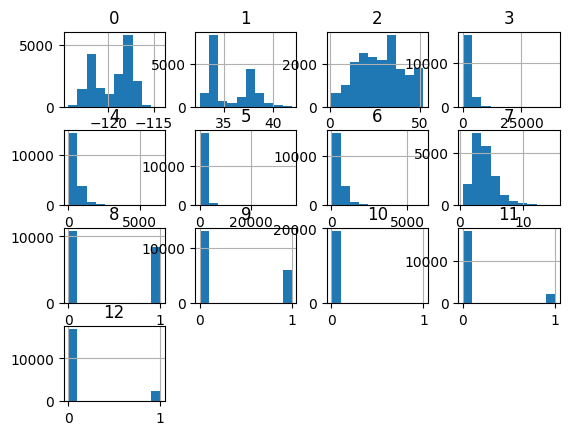

In [150]:
pd.DataFrame(x_train).hist()

<Axes: >

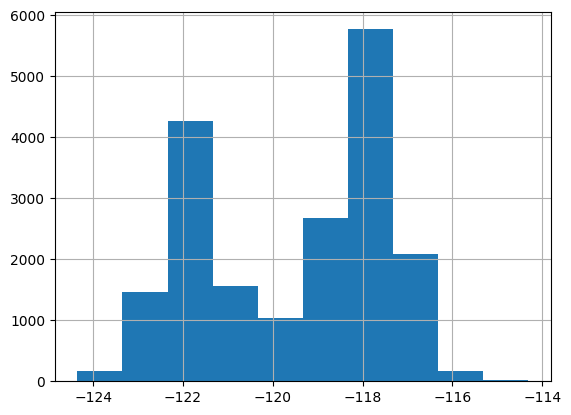

In [151]:
pd.DataFrame(x_train)[0].hist()

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>],
       [<Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>],
       [<Axes: title={'center': '12'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

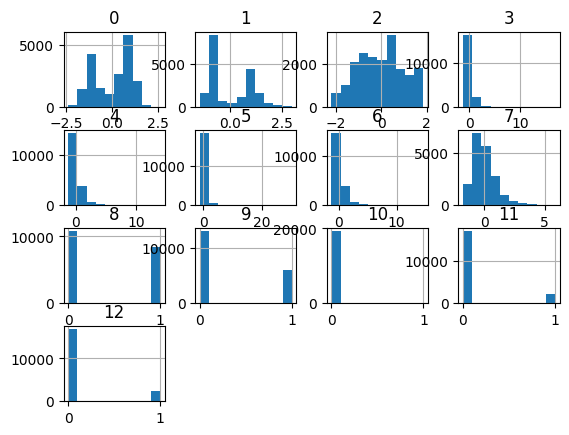

In [152]:
pd.DataFrame(x_train_preprocessed).hist()

<Axes: >

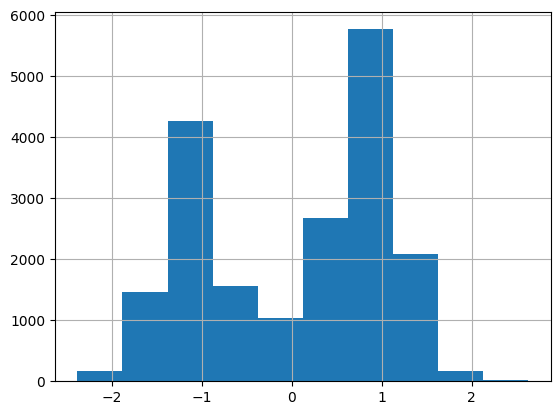

In [153]:
pd.DataFrame(x_train_preprocessed)[0].hist()

# 12. Implement the SGD and Gradient Descent Algorithm

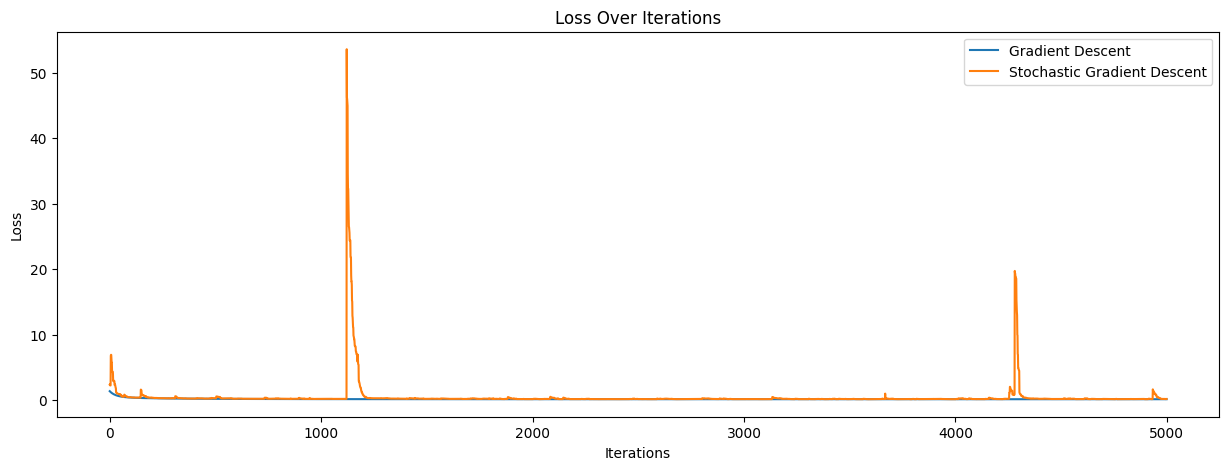

Final Results:
Gradient Descent: 
 Final Training Loss = 0.1767, Test MSE = 0.3787, Time = 0.4161 seconds
Stochastic Gradient Descent: 
 Final Training Loss = 0.2179, Test MSE = 0.4248, Time = 0.3768 seconds


In [154]:
import matplotlib.pyplot as plt
import time



def compute_mse(X, y, theta):
    predictions = X.dot(theta)
    mse = np.mean((predictions - y) ** 2) 
    return mse


# Gradient Descent Function
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    X = X.astype(np.float64) # convert X to float64
    y = y.astype(np.float64)

    m, n = X.shape  # m is number of samples, n is number of features
    theta = np.random.randn(n, 1)  # Ensure theta is (n_features, 1)
    y = y.reshape(-1, 1)  # Ensure y is (n_samples, 1) if not already
    theta_history = []  # To track the evolution of theta
    loss_history = []  # To track the evolution of loss 
    for iteration in range(n_iterations):
        
        predictions = X.dot(theta) # multiplication ->  theta dot  X
        
        errors = predictions - y # error 
        
        gradients = 2/m * X.T.dot(errors)  # 
        
        theta -= learning_rate * gradients # theta   = theta - learning_rate * gradients
        
        loss = np.mean(errors ** 2) /2 # compute mse, mean squared Error 
        
        loss_history.append(loss) # # Store current mse 
        
        theta_history.append(theta.copy())  # Store current theta
        
    return theta, loss_history, theta_history

# Stochastic Gradient Descent Function
def stochastic_gradient_descent(X, y, learning_rate=0.01, n_iterations=1000, batch_size=1): # batch_size=1
    X = X.astype(np.float64)  # Ensure X is float64
    y = y.reshape(-1, 1).astype(np.float64)  # Ensure y is (m, 1) and float64
    
    m, n = X.shape  # m: number of samples, n: number of features
    theta = np.random.randn(n, 1)  # Random initialization of theta (n_features, 1)
    loss_history = []
    theta_history = []  # To track the evolution of theta
    for iteration in range(n_iterations):
        # Get random batch of data
        indices = np.random.randint(m, size=batch_size) 
        X_i = X[indices]
        y_i = y[indices]
        
        # Compute gradients and update theta
        gradients = 2/batch_size * X_i.T.dot(X_i.dot(theta) - y_i)
        theta -= learning_rate * gradients
        
        # Compute loss for the entire dataset (optional but useful for tracking)
        loss = np.mean((y - X.dot(theta)) ** 2) / 2
        loss_history.append(loss)
        theta_history.append(theta.copy())  # Store current theta
        
    return theta, loss_history, theta_history

# Training models
start_time_gd = time.time()
theta_gd, loss_history_gd, theta_history_gd = gradient_descent(x_train_preprocessed, y_train_preprocessed, learning_rate=0.01, n_iterations=5000)#5000
end_time_gd = time.time()
time_gd = end_time_gd - start_time_gd

start_time_sgd = time.time()
theta_sgd, loss_history_sgd, theta_history_sgd = stochastic_gradient_descent(x_train_preprocessed, y_train_preprocessed, learning_rate=0.01, n_iterations=5000)#5000
end_time_sgd = time.time()
time_sgd = end_time_sgd - start_time_sgd


# Visualize loss history for both GD and SGD
plt.figure(figsize=(15, 5))
plt.plot(loss_history_gd, label='Gradient Descent')
plt.plot(loss_history_sgd, label='Stochastic Gradient Descent')
plt.title('Loss Over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Test error (MSE) for both algorithms
mse_gd = compute_mse(x_test_preprocessed, y_test_preprocessed, theta_gd)
mse_sgd = compute_mse(x_test_preprocessed, y_test_preprocessed, theta_sgd)

# print(f"Gradient Descent Test MSE: {mse_gd}")
# print(f"Stochastic Gradient Descent Test MSE: {mse_sgd}")

# # Time comparison
# print(f"Gradient Descent Runtime: {time_gd:.4f} seconds")
# print(f"Stochastic Gradient Descent Runtime: {time_sgd:.4f} seconds")

# Visualize the evolution of theta[0] (first parameter)
# plt.figure(figsize=(10, 5))
# plt.plot([theta[0][0] for theta in theta_history_gd], label="GD: Theta[0]")
# plt.plot([theta[0][0] for theta in theta_history_sgd], label="SGD: Theta[0]")
# plt.title("Evolution of Theta[0] Over Iterations")
# plt.xlabel("Iterations")
# plt.ylabel("Theta[0] Value")
# plt.legend()
# plt.show()

# Final results summary
print("Final Results:")
print(f"Gradient Descent: \n Final Training Loss = {loss_history_gd[-1]:.4f}, Test MSE = {mse_gd:.4f}, Time = {time_gd:.4f} seconds")
print(f"Stochastic Gradient Descent: \n Final Training Loss = {loss_history_sgd[-1]:.4f}, Test MSE = {mse_sgd:.4f}, Time = {time_sgd:.4f} seconds")




# 13. Compare with the real data 

In [155]:
# Vorhersagen für den Testdatensatz machen
y_pred_gd = x_test_preprocessed.dot(theta_gd)  # Für Gradient Descent
y_pred_sgd = x_test_preprocessed.dot(theta_sgd)  # Für Stochastic Gradient Descent

# Falls y skaliert wurde, hier eine hypothetische Inversskalierung:
y_pred_gd = scaler.inverse_transform(y_pred_gd)
y_pred_sgd = scaler.inverse_transform(y_pred_sgd)
y_test_preprocessed = scaler.inverse_transform(y_test_preprocessed)
# Preise anzeigen
print("Erste 10 Vorhersagen (GD):", y_pred_gd[:10].astype(int).flatten())
print("Erste 10 Vorhersagen (SGD):", y_pred_sgd[:10].astype(int).flatten())

# Möglicherweise könntest du auch den tatsächlichen Wert gegenüberstellen:
print(f"Tatsächliche Werte: {y_test_preprocessed[:10].flatten()}")



Erste 10 Vorhersagen (GD): [373831 272459 226008 254642 222838 101798 137525 163611 249976 307107]
Erste 10 Vorhersagen (SGD): [338272 245888 251622 306102 203019 149551 177537 180102 272700 357680]
Tatsächliche Werte: [442900. 309500. 240300. 267000. 190800. 175000. 124700. 176800. 161400.
 244800.]


# 14. Evaluation of all Theta_xi

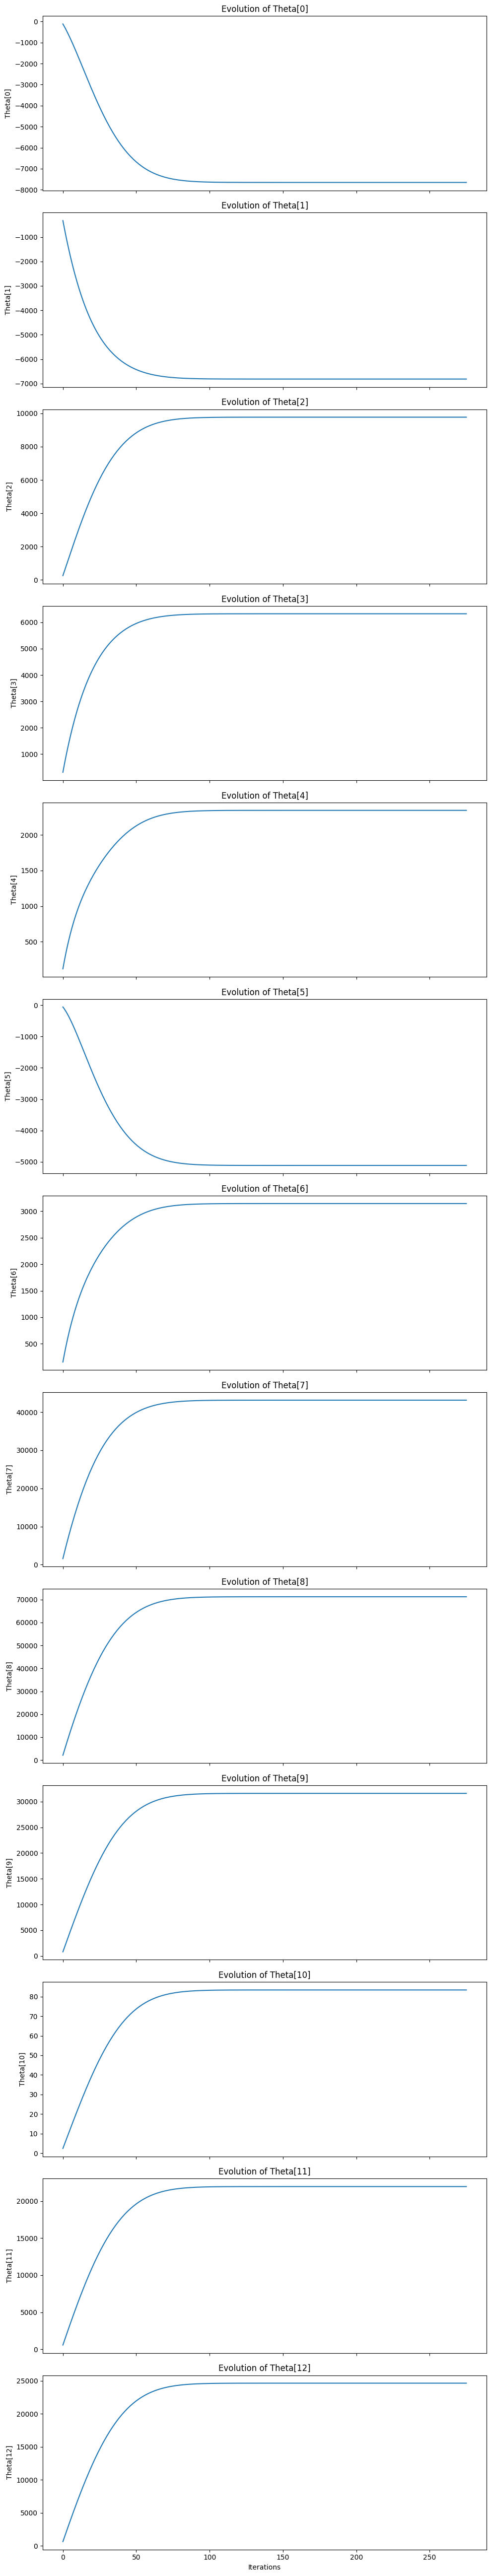

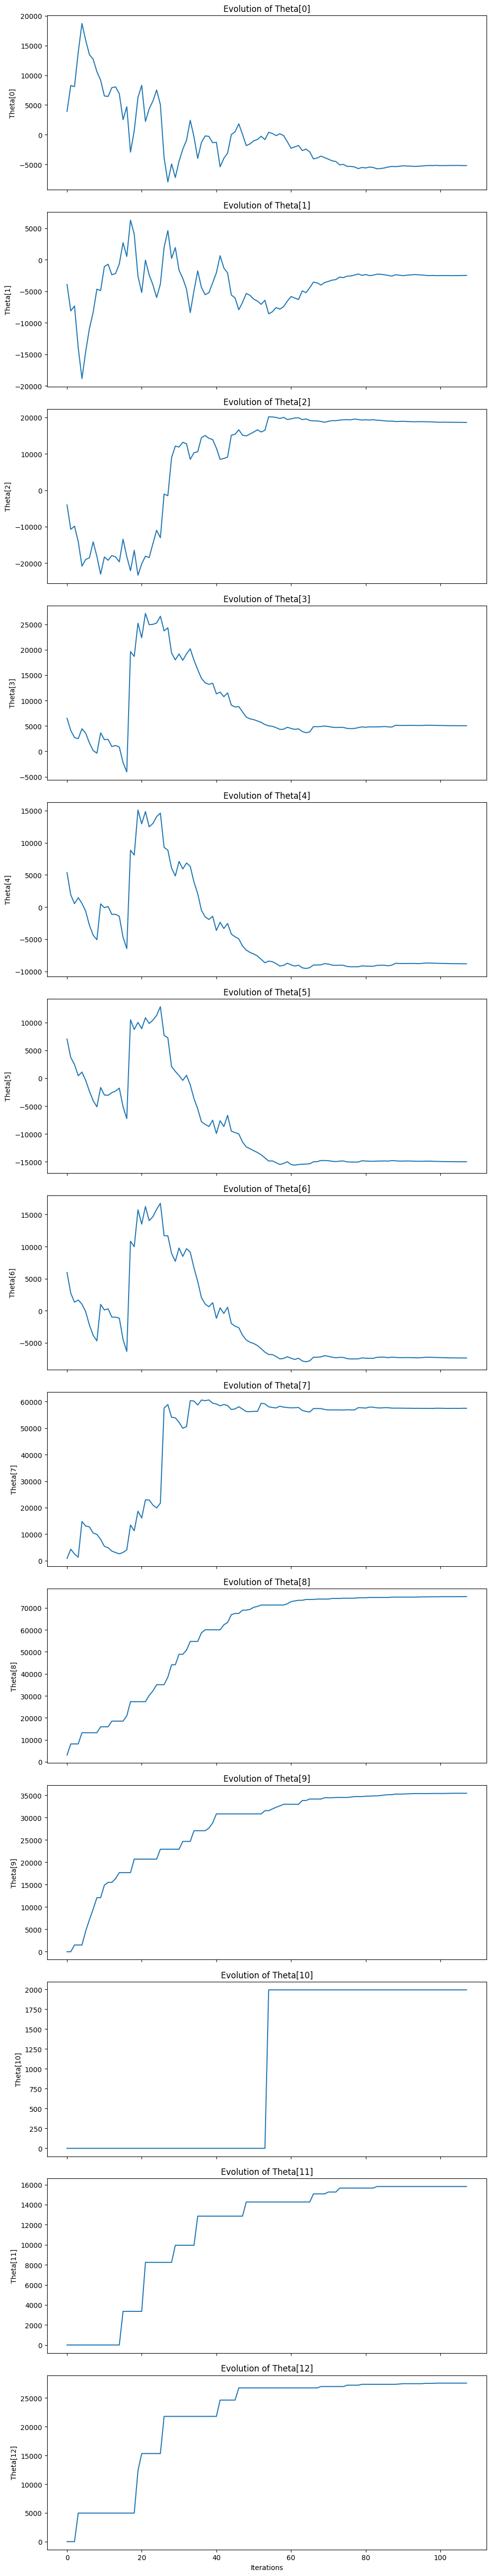

In [154]:
import matplotlib.pyplot as plt

def plot_all_dimensions(theta_history):
    
    num_dims = len(theta_history[0])
    fig, axes = plt.subplots(num_dims, 1, figsize=(10, num_dims * 4), sharex=True)
    
    for i in range(num_dims):
        dimension_values = [theta[i][0] for theta in theta_history]
        axes[i].plot(dimension_values)
        axes[i].set_ylabel(f'Theta[{i}]')
        axes[i].set_title(f'Evolution of Theta[{i}]')
    
    axes[-1].set_xlabel('Iterations')
    plt.tight_layout()
    plt.show()

# Example usage
plot_all_dimensions(theta_history_gd)
plot_all_dimensions(theta_history_sgd)
